# Modeling a miRNA Regulatory Network using NetworkX

NetworkX is a Python language software package for the creation, manipulation, and study of the structure, dynamics, and functions of complex networks. See https://networkx.github.io/ for more information.

In [1]:
import networkx as nx

## Build up a miRNA regulatory network from an edge list

We use a directed graph (nx.DiGraph instance) to model the miR-target network.

In [2]:
G = nx.read_edgelist("../hw4/hw4.tsv", delimiter="\t", create_using=nx.DiGraph())
G.remove_edge('miR Family', 'Gene Symbol')  # remove the header line

## Degrees

The requirements in hw4 can be easily achieved.

In [3]:
indeg = G.in_degree()
gene = sorted(indeg, key=indeg.get)[-1]
print gene, 'has largest indegree', indeg[gene]

TNRC6B has largest indegree 80


In [6]:
# Try it yourself. Give me the miRNA w/ largest out-degree here:
outdeg = G.out_degree()
miR = sorted(indeg, key=outdeg.get)[-1]
print miR, 'has largest outdegree', outdeg[miR]

miR-124/124ab/506 has largest outdegree 1791


In [7]:
from itertools import combinations
miRs = [n for n in G if G.out_degree(n) > 0]
pair2size = {(a,b): len(set(G.neighbors(a)) & set(G.neighbors(b))) \
             for a,b in combinations(miRs, 2)}
pair, size = sorted(pair2size.items(), key=lambda i: i[1])[-1]
print pair
print size

(u'miR-182', u'miR-96/507/1271')
881


In [8]:
from itertools import combinations
miRs = [n for n in G if G.out_degree(n) > 0]
print miRs

[u'miR-202-3p', u'miR-196abc', u'miR-101/101ab', u'miR-197', u'miR-191', u'miR-29abcd', u'miR-339b/339-5p/3586-5p', u'miR-10abc/10a-5p', u'miR-425/425-5p/489', u'miR-134/3118', u'miR-410/344de/344b-1-3p', u'let-7/98/4458/4500', u'miR-299/299-3p/3563-3p', u'miR-26ab/1297/4465', u'miR-185/882/3473/4306/4644', u'miR-148ab-3p/152', u'miR-421', u'miR-141/200a', u'miR-33ab/33-5p', u'miR-379/1193-5p/3529', u'miR-128/128ab', u'miR-103a/107/107ab', u'miR-376c/741-5p', u'miR-874', u'miR-384/384-3p', u'miR-194', u'miR-138/138ab', u'miR-873', u'miR-455-5p', u'miR-145', u'miR-144', u'miR-486-5p/3107', u'miR-217', u'miR-539/539-5p', u'miR-135ab/135a-5p', u'miR-23abc/23b-3p', u'miR-488', u'miR-338/338-3p', u'miR-31', u'miR-125a-3p/1554', u'miR-328a/328b-3p', u'miR-346', u'miR-192/215', u'miR-136', u'miR-210', u'miR-216a', u'miR-374ab', u'miR-377', u'miR-218/218a', u'miR-190/190ab', u'miR-137/137ab', u'miR-22/22-3p', u'miR-615-3p', u'miR-490-3p', u'miR-204/204b/211', u'miR-326/330/330-5p', u'miR-143/1

## Degree distribution

In [9]:
import pandas as pd
from pylab import *
%matplotlib inline

Build a node property dataframe using pandas:

In [11]:
df = pd.DataFrame({"in_degree": indeg})

Plot the in-degree distribution for genes (ignore miRs becasue their in-degrees are all zero)

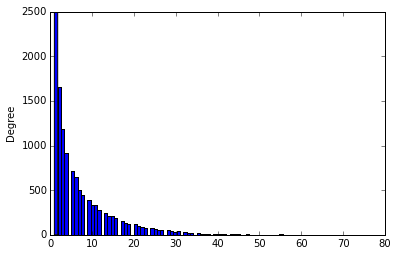

In [29]:
df[df["in_degree"] > 0]["in_degree"].plot(kind='hist', bins=100)

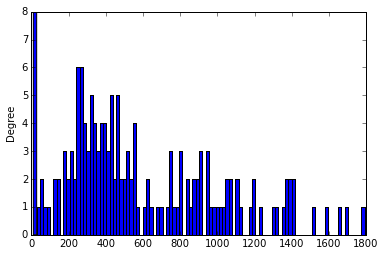

In [28]:
mi = pd.DataFrame({"out_degree": outdeg})
mi[mi["out_degree"] > 0]["out_degree"].plot(kind="hist", bins=100)

Now it's your turn. Show me the miR out-degree distribution.

## Draw the network for a specific miRNA family

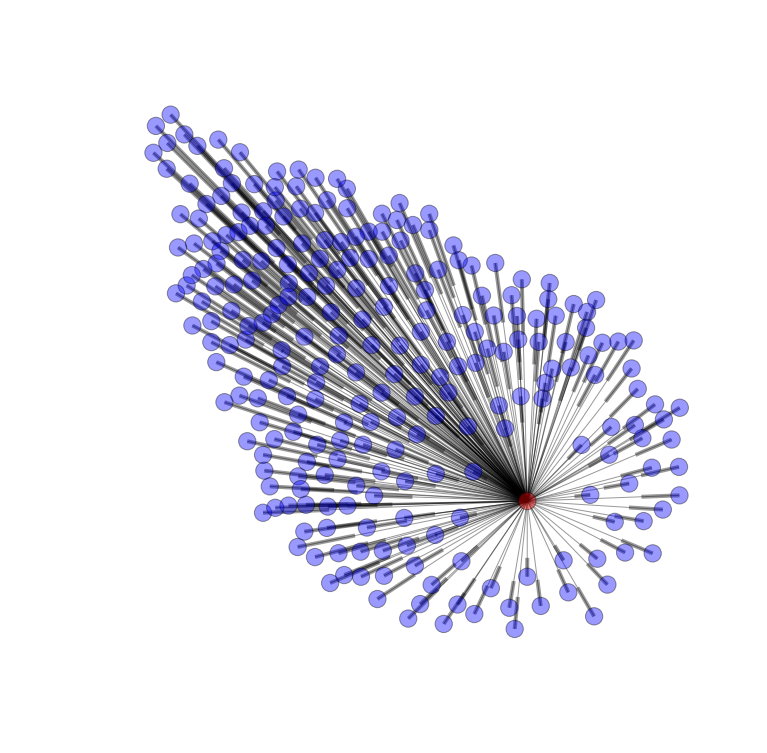

In [21]:
miR = 'miR-339b/339-5p/3586-5p'
targets = G.neighbors(miR)
g = G.subgraph([miR] + targets)
colors = ['r' if n == miR else 'b' for n in g.nodes()]
figure(figsize=(10,10))
nx.draw(g, node_color=colors, alpha=.4)

Wrap it into a function (e.g., `draw_network`) so that the user can draw a network by calling `draw_network('miR-339b/339-5p/3586-5p')`.

miR:miR-339b/339-5p/3586-5p


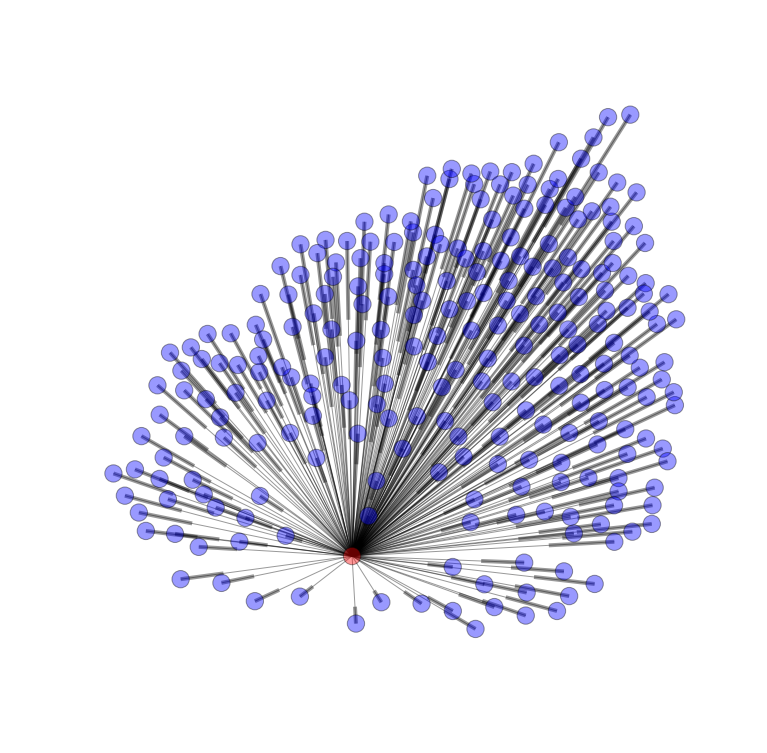

In [32]:
def draw_network(miR):
    miR = raw_input("miR:")
    targets = G.neighbors(miR)
    g = G.subgraph([miR] + targets)
    colors = ['r' if n == miR else 'b' for n in g.nodes()]
    figure(figsize=(10,10))
    nx.draw(g, node_color=colors, alpha=.4)
draw_network(miR)